In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_image(filename, resized_height=None, resized_width=None):
    bgr_img = cv2.imread(filename)
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    if rgb_img is None:
        raise ValueError("Image not found or unable to read")
    
    h, w, _ = rgb_img.shape

    if resized_width is None and resized_height is not None:
        resized_width = int(w * resized_height / h)
    elif resized_width is not None and resized_height is None:
        resized_height = int(h * resized_width / w)
    elif resized_width is None and resized_height is None:
        resized_height, resized_width = h, w

    rgb_img = cv2.resize(rgb_img, (resized_width, resized_height))
    return rgb_img

def plot_2d_arrays(arrays: list):
    n = len(arrays)

    grid_size = int(np.ceil(np.sqrt(n)))

    fig, axes = plt.subplots(int(np.ceil(n/grid_size)), grid_size, figsize=(10, 10))
    if n > 1:
        axes_flat = axes.flatten()
    else:
        axes_flat = [axes]
    

    for i, (array, title) in enumerate(arrays):
        if i < n:
            ax = axes_flat[i]
            im = ax.imshow(array, cmap='gray')
            ax.set_title(title)
            ax.axis('off')
            fig.colorbar(im, ax=ax)
        else:
            axes_flat[i].axis('off')

    plt.tight_layout()
    plt.show()

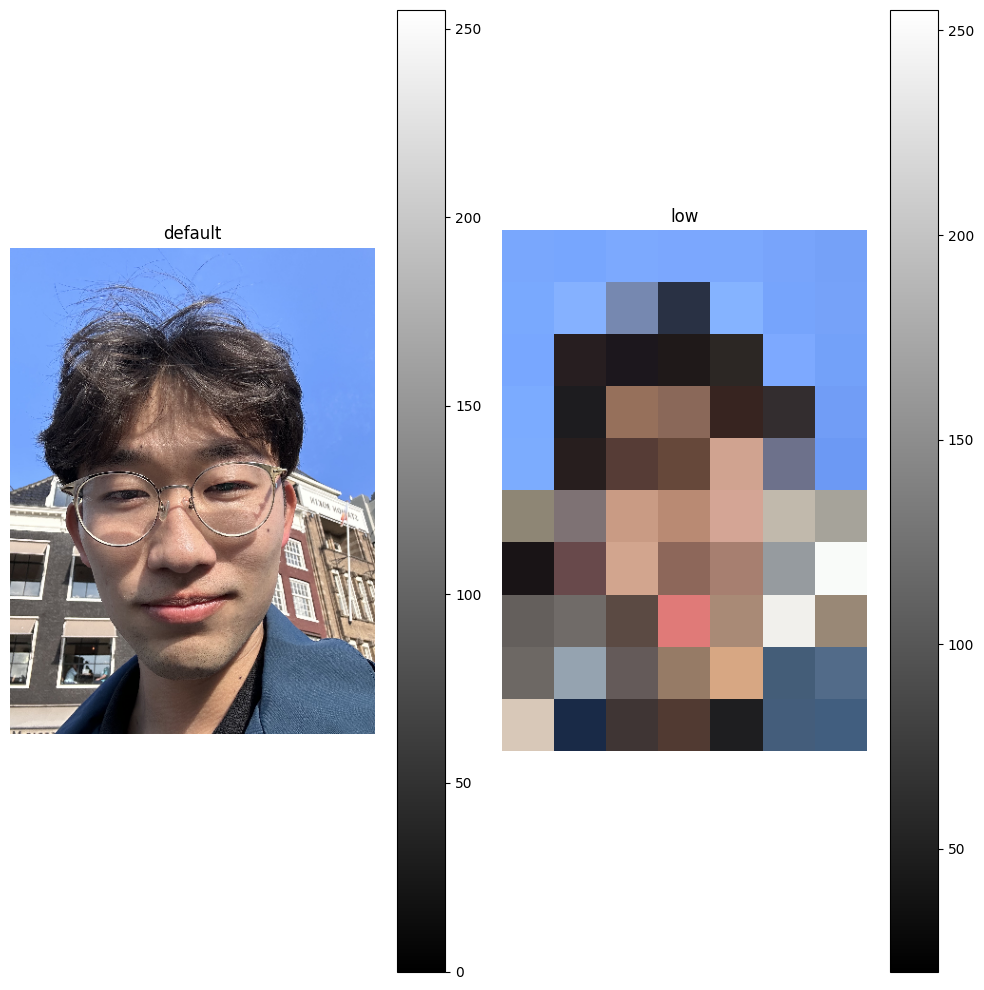

In [3]:
image_path = "D:/Casper/Data/Chill_norman/norman1.jpg"
img = read_image(image_path,512)
low_img = read_image(image_path, 10)
data = [
    (img, "default"),
    (low_img, "low"),
]
    

plot_2d_arrays(data)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


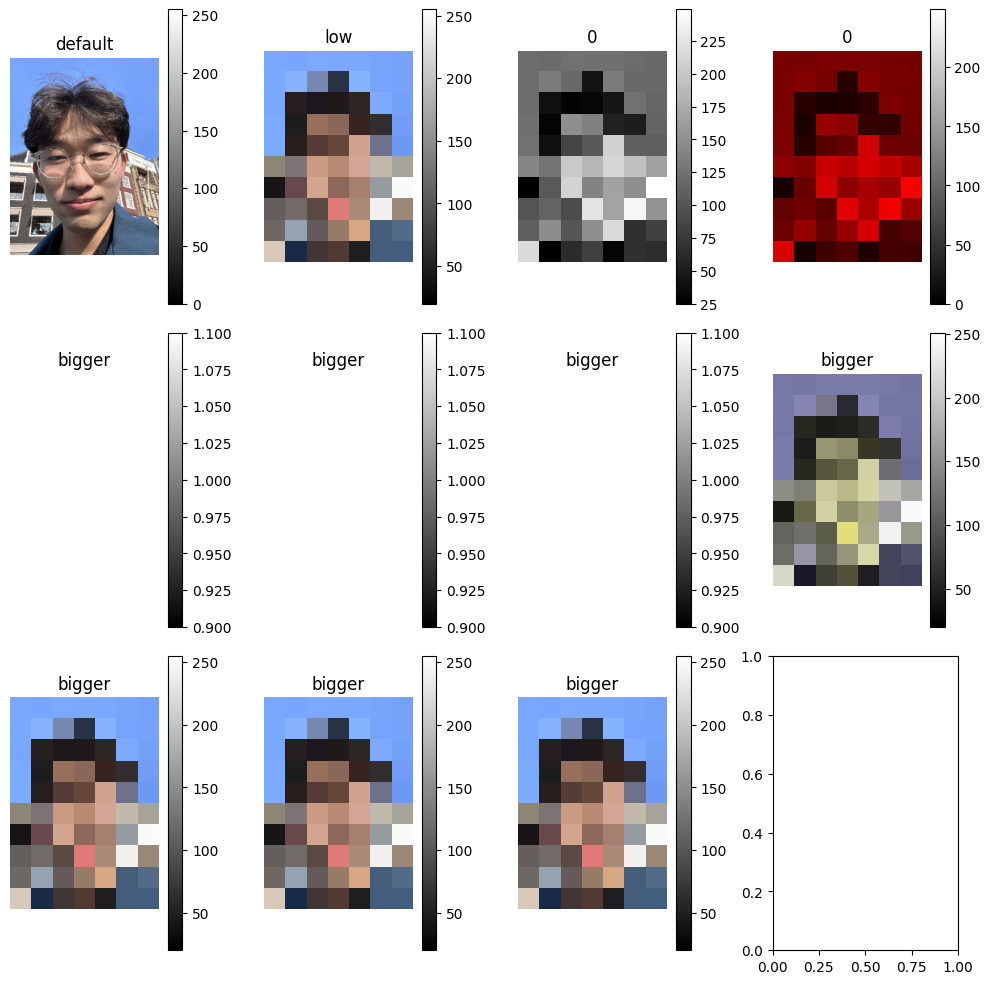

In [38]:
def Nearest_neighbor_enlarge(img, size=2):
    h, w, c = img.shape
    h *= size
    w *= size
    new_img = np.zeros((h,w,c), int)

    for ii in range(h):
        for jj in range(w):
            for kk in range(c):
                new_img[ii,jj,kk] = img[ii//size, jj//size, kk]

    return new_img
# def Bilinear_enlarge(img, size=2):

nn_img = Nearest_neighbor_enlarge(low_img, 2)

data.append((nn_img, "bigger"))



In [5]:
import numpy as np

def calculate_row_means(image_array, vertical=0):
    if not isinstance(image_array, np.ndarray) or len(image_array.shape) != 3:
        raise ValueError("Input must be a numpy array with shape (h, w, c)")

    row_means = image_array.mean(axis=vertical).astype(int)

    if vertical:
        row_means_reshaped = row_means.reshape((row_means.shape[0], 1, row_means.shape[1]))
    else:
        row_means_reshaped = row_means.reshape((1,) + row_means.shape)
    return row_means_reshaped

horizontal_img = calculate_row_means(low_img, 0)
vertical_img = calculate_row_means(low_img, 1)
print(horizontal_img.shape)
print(vertical_img.shape)
data.append((horizontal_img, 'hori'))
data.append((vertical_img, 'verti'))


(1, 7, 3)
(10, 1, 3)


In [18]:
def row_multi(horizontal, vertical):
    h = vertical.shape[0]
    w = horizontal.shape[1]
    c = horizontal.shape[2]
    img = np.zeros((h,w,c), int)
    for ii in range(h):
        for jj in range(w):
            for kk in range(c):
                img[ii, jj, kk] = np.sqrt(horizontal[0, jj, kk] * vertical[ii, 0, kk]).astype(int)
    return img

multi_img = row_multi(horizontal_img, vertical_img)
data.append((multi_img, 'result_img'))



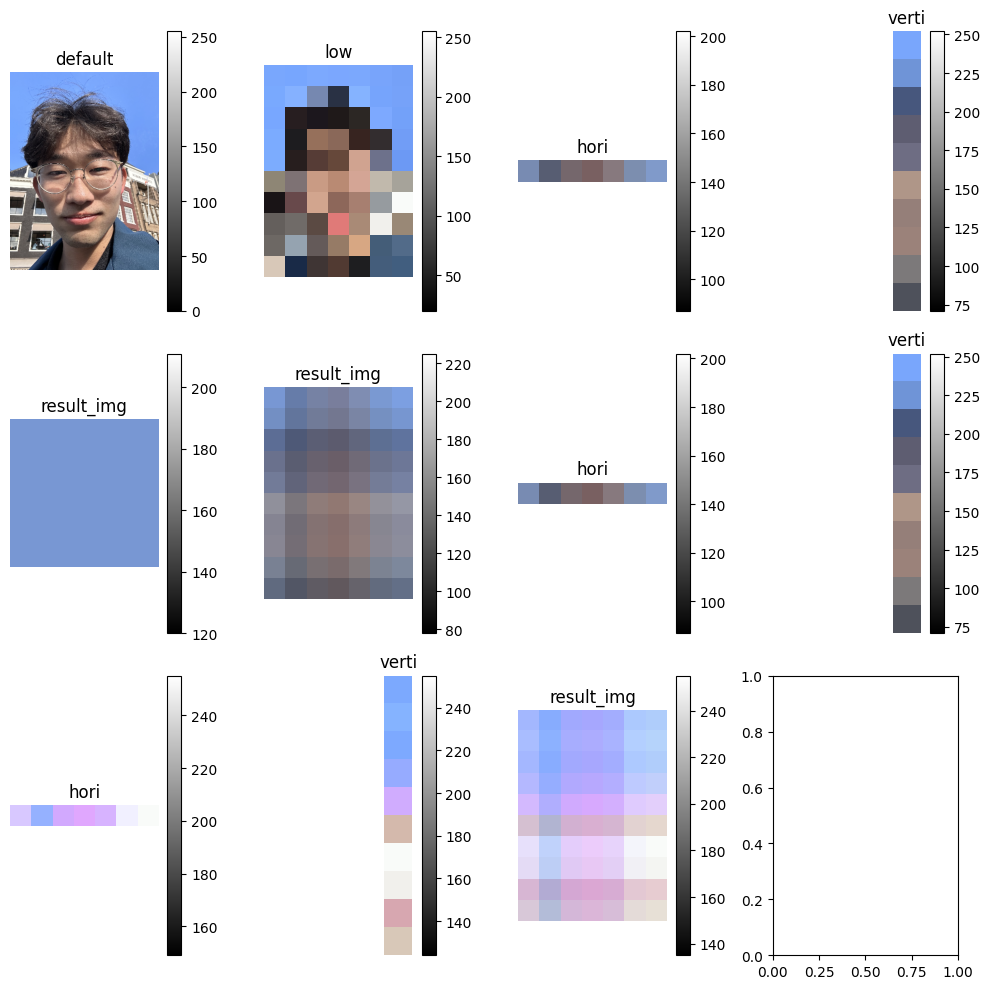

In [19]:
plot_2d_arrays(data)
